In [1]:
import pandas as pd
import yfinance as yf
from webapp.fincalc.portfolio_analytics import calculate_stock_volatility, check_volatility_signal
import numpy as np
import matplotlib.ticker as mticker # For formatting y-axis as percentage

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
yf.download(["IONQ", "QUBT", "RGTI", "QMCO"], period="1mo", progress=False)

YF.download() has changed argument auto_adjust default to True


Price           Close                          High                         \
Ticker           IONQ   QMCO  QUBT  RGTI       IONQ   QMCO    QUBT    RGTI   
Date                                                                         
2025-03-26  24.799999  15.01  8.01  9.18  27.830000  17.07  8.8800  10.310   
2025-03-27  23.650000  15.39  7.94  8.47  25.200001  16.99  7.9980   9.190   
2025-03-28  22.850000  14.15  8.45  8.15  23.660000  15.37  8.5400   8.419   
2025-03-31  22.070000  14.38  8.00  7.92  23.098000  14.58  8.9700   8.295   
2025-04-01  23.190001  14.07  7.76  7.81  24.620001  15.30  8.4000   8.127   
2025-04-02  25.049999  13.11  7.85  8.49  25.834999  13.83  8.2900   8.920   
2025-04-03  23.250000  12.44  7.57  8.15  23.778999  12.60  7.6800   8.310   
2025-04-04  20.680000  11.35  6.51  7.50  22.870001  12.00  7.3500   7.783   
2025-04-07  22.750000  11.25  6.77  8.33  24.000000  12.50  7.0600   8.780   
2025-04-08  21.280001  10.48  6.21  7.72  24.599001  12.48  7.1100   8.960   
2025-04-09  26.370001  12.08  6.85  9.39  26.559999  12.39  7.0600   9.460   
2025-04-10  25.889999  11.08  6.85  9.42  26.615000  11.86  7.0400   9.740   
2025-04-11  26.090000  11.22  6.84  9.10  27.250000  11.48  7.0200   9.540   
2025-04-14  25.350000  12.19  6.99  8.86  28.250000  12.30  7.5750   9.700   
2025-04-15  25.400000  11.20  6.83  8.62  26.075001  12.88  7.0800   8.960   
2025-04-16  24.570000  10.40  6.41  8.25  25.360001  11.13  6.7000   8.420   
2025-04-17  25.740000  10.32  6.41  8.32  25.870001  10.78  6.5200   8.475   
2025-04-21  24.030001   9.84  5.87  8.11  25.200001  10.12  6.2300   8.205   
2025-04-22  25.559999   9.92  5.94  8.57  25.930000  10.13  6.0800   8.580   
2025-04-23  26.799999  10.40  6.37  9.11  27.840000  11.38  6.8300   9.350   
2025-04-24  28.389999  11.38  6.94  9.30  29.580000  12.05  7.2600   9.730   
2025-04-25  28.900000  11.84  7.13  9.37  31.850000  12.16  7.5694   9.800   

Price             Low                             Open                       \
Ticker           IONQ    QMCO   QUBT   RGTI       IONQ   QMCO   QUBT   RGTI   
Date                                                                          
2025-03-26  24.660000  14.690  7.800  9.090  26.730000  16.40  8.560  9.890   
2025-03-27  23.445000  14.270  7.580  8.410  24.090000  14.50  7.870  9.020   
2025-03-28  21.920000  14.070  7.305  7.782  23.660000  15.13  7.725  8.400   
2025-03-31  21.500000  12.850  7.650  7.680  21.670000  13.07  8.020  7.770   
2025-04-01  22.219999  13.640  7.350  7.510  24.309999  14.73  8.200  8.105   
2025-04-02  22.690001  12.750  7.471  7.550  23.080000  13.21  7.500  7.590   
2025-04-03  22.530001  11.740  7.110  7.910  23.125000  12.11  7.200  7.980   
2025-04-04  19.370001  10.820  6.310  6.980  22.600000  11.98  7.190  7.770   
2025-04-07  18.809999   9.740  6.000  6.860  19.610001  10.00  6.010  6.920   
2025-04-08  20.650000  10.330  6.105  7.520  24.049999  12.48  7.030  8.940   
2025-04-09  21.361000  10.360  5.910  7.700  21.875000  10.48  6.100  7.980   
2025-04-10  24.450001  10.600  6.520  8.850  25.330000  11.42  6.750  9.065   
2025-04-11  25.371000  10.580  6.522  8.690  26.240000  11.20  6.860  9.450   
2025-04-14  24.750000  11.560  6.760  8.780  27.700001  11.95  7.200  9.400   
2025-04-15  24.665001  11.200  6.710  8.450  25.590000  12.55  6.950  8.870   
2025-04-16  23.801001  10.280  6.280  7.980  24.450001  10.66  6.700  8.280   
2025-04-17  24.480000   9.960  6.244  8.075  24.930000  10.55  6.400  8.290   
2025-04-21  23.485001   9.600  5.760  7.810  25.155001  10.00  6.210  8.170   
2025-04-22  23.930000   9.590  5.890  8.125  24.490000   9.93  5.920  8.230   
2025-04-23  26.270000  10.180  6.330  8.870  27.090000  10.65  6.330  9.060   
2025-04-24  26.959999  10.570  6.250  9.140  27.000000  10.57  6.390  9.228   
2025-04-25  27.710400  11.152  6.790  8.970  28.420000  11.41  6.965  9.202   

Price         Volume                               
Ticker          IONQ 

In [3]:

# Define the stock tickers
tickers = ['IONQ', 'QUBT', 'RGTI', 'QMCO']

# Define the period for historical data (e.g., "1y" for one year)
period = "5d"

# Calculate the daily volatility (standard deviation of daily returns)
print(f"Calculating daily volatility for {tickers} over the past {period}...")
volatility_data = calculate_stock_volatility(tickers, period=period)

INFO:webapp.fincalc.portfolio_analytics:Calculating volatility for tickers: ['IONQ', 'QUBT', 'RGTI', 'QMCO'] over period: 5d


Calculating daily volatility for ['IONQ', 'QUBT', 'RGTI', 'QMCO'] over the past 5d...


INFO:webapp.fincalc.portfolio_analytics:Volatility calculation complete: {'IONQ': np.float64(0.02061325992181789), 'QUBT': np.float64(0.0366119008289346), 'RGTI': np.float64(0.027047565296389974), 'QMCO': np.float64(0.0355166930463557)}


In [4]:
volatility_data

{'IONQ': np.float64(0.02061325992181789),
 'QUBT': np.float64(0.0366119008289346),
 'RGTI': np.float64(0.027047565296389974),
 'QMCO': np.float64(0.0355166930463557)}

In [5]:


# Or use the default 5 days
signal_results_default = check_volatility_signal(tickers, volatility_data, recent_period="2d")

INFO:webapp.fincalc.portfolio_analytics:Checking volatility signal for tickers: ['IONQ', 'QUBT', 'RGTI', 'QMCO']
INFO:webapp.fincalc.portfolio_analytics:Fetching recent data for period: 2d for tickers: ['IONQ', 'QUBT', 'RGTI', 'QMCO']
INFO:webapp.fincalc.portfolio_analytics:Volatility signal check complete. Returning DataFrame.


In [6]:
signal_results_default

,latest_return,sigma,is_significant,status
ticker,,,,
IONQ,0.017964,0.020613,False,Success
QUBT,0.027378,0.036612,False,Success
RGTI,0.007527,0.027048,False,Success
QMCO,0.040422,0.035517,True,Success


Analyzing HOURLY volatility for ['IONQ', 'QUBT', 'RGTI', 'QMCO'] over 3d (5m interval) with a 24-hour window...
Price                      Close                        High                   \
Ticker                      IONQ     QMCO  QUBT  RGTI   IONQ     QMCO    QUBT   
Datetime                                                                        
2025-04-25 22:15:00+00:00  28.75      NaN  7.11  9.33  28.79      NaN  7.1100   
2025-04-25 22:20:00+00:00  28.71  11.7751  7.11  9.34  28.73  11.7751  7.1199   
2025-04-25 22:25:00+00:00  28.70  11.8000  7.11  9.32  28.71  11.8000  7.1103   
2025-04-25 22:30:29+00:00  28.70      NaN   NaN   NaN  28.70      NaN     NaN   
2025-04-25 22:30:32+00:00    NaN      NaN   NaN  9.32    NaN      NaN     NaN   

Price                                Low                          Open  \
Ticker                       RGTI   IONQ     QMCO  QUBT  RGTI     IONQ   
Datetime                                                                 
2025-04-25 22:15:

/var/folders/pf/208rzxg52mgdzw7l_q0vql5h0000gn/T/ipykernel_28163/3729715878.py:33: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  hourly_returns = close_prices.pct_change()


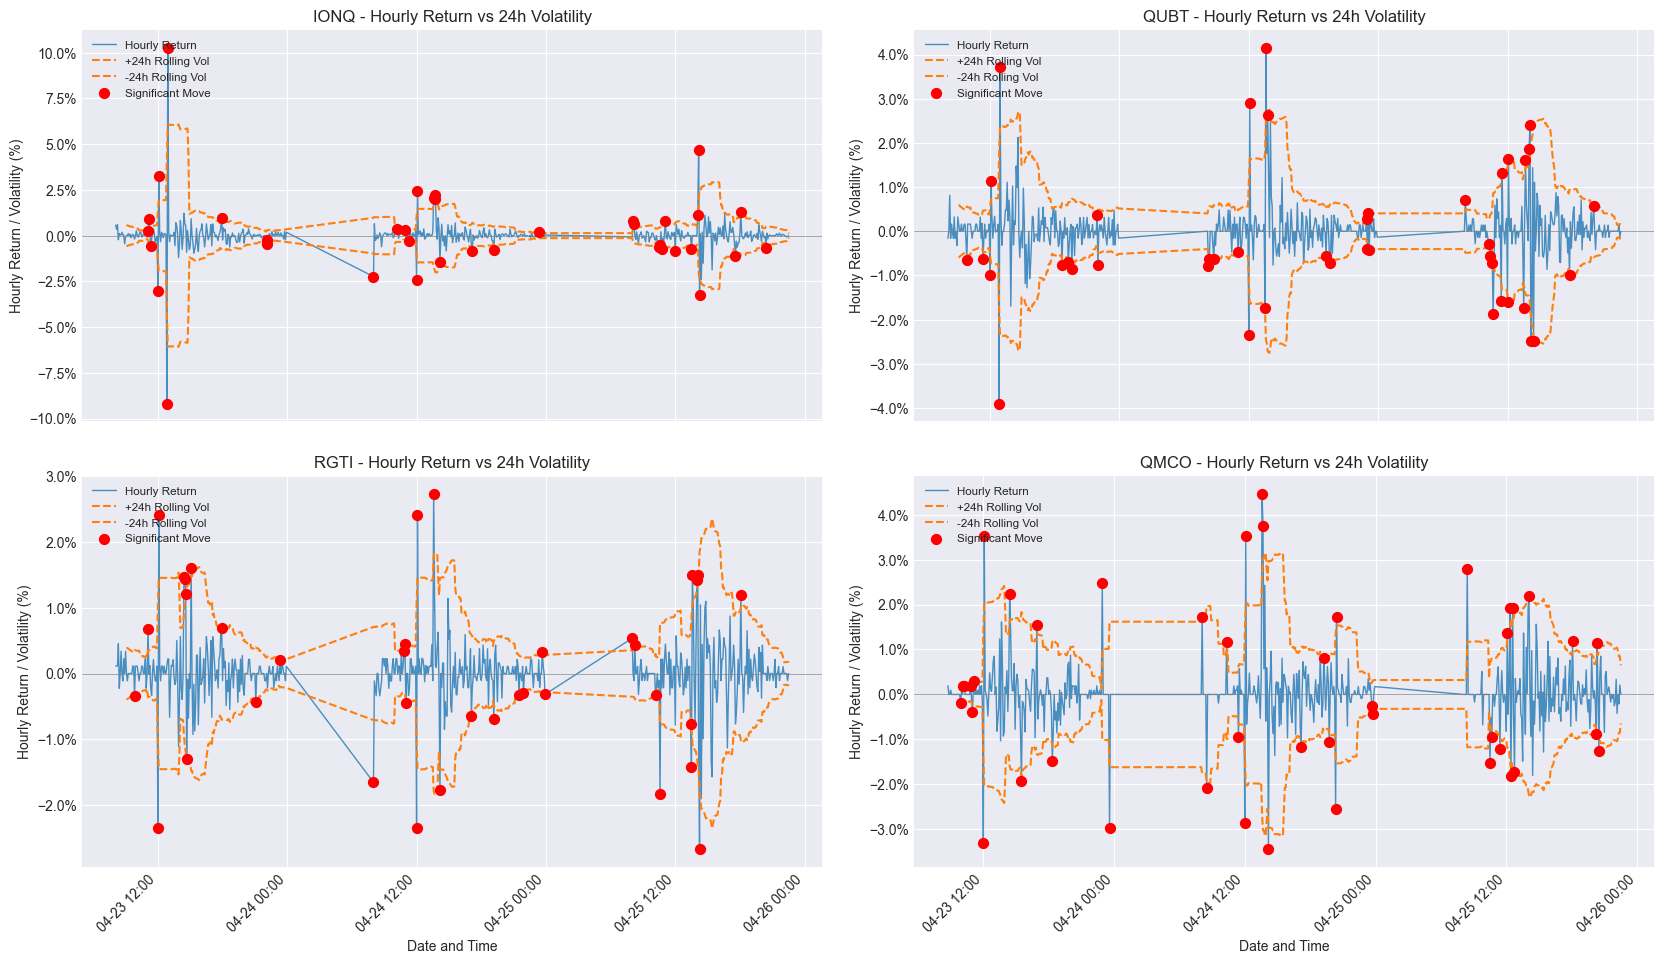

In [7]:
# Define the tickers and the period/interval for analysis
# tickers = ['IONQ', 'QUBT', 'RGTI', 'QMCO'] # Make sure this list is defined
fetch_period = "3d"       # Fetch data for the last 7 days
fetch_interval = "5m"     # Fetch hourly data
rolling_window = 24     # Rolling window in hours (e.g., one trading day)
vol_factor = 2
print(f"Analyzing HOURLY volatility for {tickers} over {fetch_period} ({fetch_interval} interval) with a {rolling_window}-hour window...")

try:
    # Fetch historical INTRADAY data
    hist_data = yf.download(
        tickers,
        period=fetch_period,
        interval=fetch_interval,
        prepost=True,
        progress=False
    )

    # Optional: Filter out data outside regular trading hours
    # hist_data = hist_data.tz_convert('America/New_York')
    # hist_data = hist_data.between_time('09:30', '16:00')
    # hist_data = hist_data.tz_convert(None)
    print(hist_data.tail())

    if hist_data.empty:
        print("Could not fetch historical intraday data. Check period/interval/ticker validity.")
    else:
        close_prices = hist_data['Low']
        if isinstance(close_prices, pd.Series) and len(tickers) == 1:
            close_prices = close_prices.to_frame(name=tickers[0])

        # Calculate HOURLY returns
        hourly_returns = close_prices.pct_change()

        # Calculate rolling standard deviation (HOURLY volatility)
        rolling_volatility = vol_factor * hourly_returns.rolling(window=rolling_window, min_periods=rolling_window//2 + 1).std()

        # Identify significant moves (current hourly return > previous hour's rolling vol)
        significant_moves = np.abs(hourly_returns) > rolling_volatility.shift(1)

        # --- Plotting ---
        num_tickers = len(tickers)
        plt.style.use('seaborn-v0_8-darkgrid')

        cols = 2
        rows = (num_tickers + cols - 1) // cols
        fig, axes = plt.subplots(rows, cols, figsize=(17, rows * 5), squeeze=False) # Adjusted size
        axes_flat = axes.flatten()

        for i, ticker in enumerate(tickers):
            ax = axes_flat[i] # Use single axis per subplot now

            if ticker not in hourly_returns.columns or hourly_returns[ticker].isnull().all():
                ax.set_title(f"{ticker} - Data Missing or Empty")
                continue

            # Prepare data, dropping potential NaNs from the start
            plot_returns = hourly_returns[ticker].dropna()
            plot_vol = rolling_volatility[ticker].dropna()
            # Align significant moves boolean series with returns index for plotting markers
            plot_sig_moves = significant_moves[ticker].reindex(plot_returns.index).fillna(False)


            # Plot HOURLY RETURNS
            color_ret = 'tab:blue'
            ax.plot(plot_returns.index, plot_returns, color=color_ret, label='Hourly Return', linewidth=1, alpha=0.8)

            # Plot ROLLING VOLATILITY on the SAME axis
            color_vol = 'tab:orange'
            # Plot both positive and negative volatility lines for comparison band
            ax.plot(plot_vol.index, plot_vol, color=color_vol, label=f'+{rolling_window}h Rolling Vol', linestyle='--', linewidth=1.5)
            ax.plot(plot_vol.index, -plot_vol, color=color_vol, label=f'-{rolling_window}h Rolling Vol', linestyle='--', linewidth=1.5)


            # Find points where significant moves occurred
            significant_idx = plot_returns.index[plot_sig_moves]
            significant_returns_plot = plot_returns.loc[significant_idx]

            # Plot markers for significant moves on the returns plot
            if not significant_idx.empty:
                ax.scatter(significant_idx, significant_returns_plot, color='red', marker='o', s=50, label='Significant Move', zorder=5)

            # Add a horizontal line at 0
            ax.axhline(0, color='grey', linestyle='-', linewidth=0.5)

            # Formatting
            ax.set_xlabel('Date and Time')
            ax.set_ylabel('Hourly Return / Volatility (%)')
            ax.set_title(f'{ticker} - Hourly Return vs {rolling_window}h Volatility')
            ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # Format y-axis as percentage

            # Improve x-axis date formatting
            ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=4, maxticks=8))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
            fig.autofmt_xdate(rotation=45)

            # Add legend
            ax.legend(loc='upper left', fontsize='small')


        # Hide any unused subplots
        for j in range(i + 1, len(axes_flat)):
             fig.delaxes(axes_flat[j])

        plt.tight_layout(pad=2.0)
        plt.show()

except Exception as e:
    print(f"An error occurred during analysis or plotting: {e}")

Fetching data for ['IONQ', 'QUBT', 'RGTI', 'QMCO'] from 2025-04-01 to 2025-04-26 with interval 5m...


/Users/abatutin/Documents/projects/interactive-brokers-web-api/backtester/simple_backtester.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[f'{ticker}_Close'] = data['Close'][ticker]
/Users/abatutin/Documents/projects/interactive-brokers-web-api/backtester/simple_backtester.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[f'{ticker}_Close'] = data['Close'][ticker]
/Users/abatutin/Documents/projects/interactive-brokers-web-api/backtester/simple_backtester.py:109: SettingWithCop

Data fetched successfully.
Calculating signals using 'bollinger_bands' strategy...
Signals calculated.
Running backtest simulation...
Backtest simulation finished.
Calculating performance metrics...
--- Performance Metrics ---
- Initial Capital: 10000.00
- Final Portfolio Value: 10358.96
- Total Return (%): 3.59
- Annualized Return (%): 68.90
- Annualized Volatility (%): 2.69
- Sharpe Ratio: 25.57
- Max Drawdown (%): -4.74
- Number of Trades: 596
- Win Rate (%): 62.63
-------------------------


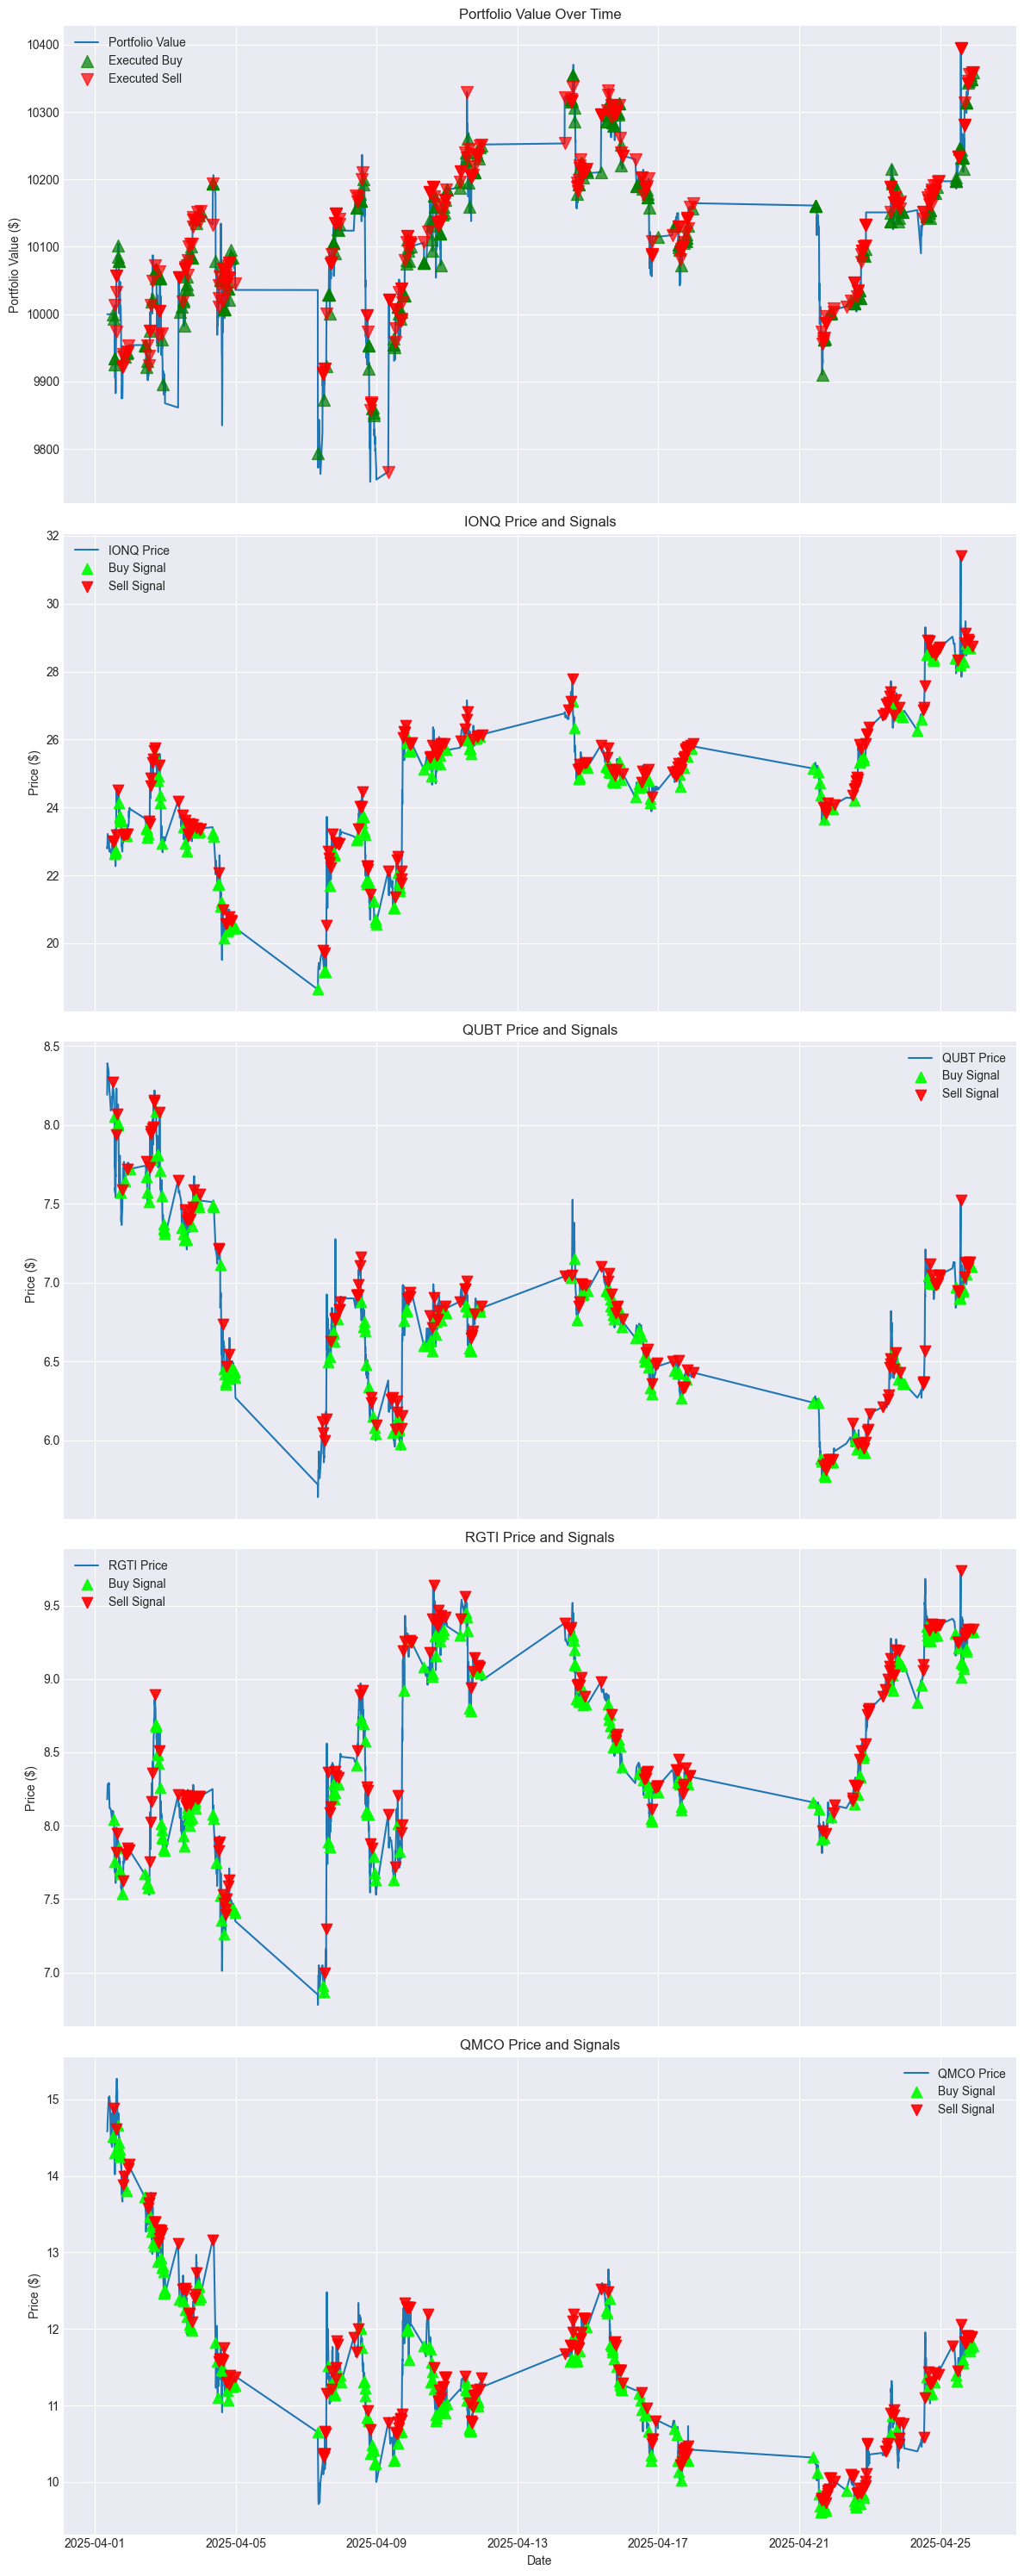

In [15]:
from backtester.simple_backtester import SimpleBacktester

tickers_to_test = tickers
start = '2025-04-01'
end = '2025-04-26'

bb_params = {
        'window': 15,    # 20-day SMA
        'num_std': 1   # 2 standard deviations
    }

backtester = SimpleBacktester(
        tickers=tickers_to_test,
        start_date=start,
        end_date=end,
        strategy_name='bollinger_bands',
        strategy_params=bb_params,
        initial_capital=10000.0,
        trade_size_fraction=0.1,
        interval='5m'
    )


backtester.run()
backtester.plot_results() # Show plot after running